## README:

1. Run the pre processing part as it is:

2. Can independently run the model sections.

3. The best one is the neural network one which is at the last part.

In [7]:
#Common data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/mk/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Pre processing

In [8]:
demand = 'Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Demand Data upto Feb 21.csv'
demand_df = pd.read_csv(demand)
demand_df = demand_df.drop(['datetime'], axis=1) #Weather already has it

In [9]:
weather = 'Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Weather Data upto Feb 28.csv'
weather_df = pd.read_csv(weather)
weather_df = weather_df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)

In [10]:
weather_df

,Name,datetime,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,...,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
0,Pokhara,1/1/2020 0:00,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,...,NaN,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast
1,Pokhara,1/1/2020 1:00,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,...,NaN,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast
2,Pokhara,1/1/2020 2:00,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,...,NaN,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast
3,Pokhara,1/1/2020 3:00,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,...,NaN,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy
4,Pokhara,1/1/2020 4:00,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,...,NaN,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27715,Pokhara,2/28/2023 19:00,56.0,56.0,39.8,54.45,0.0,0,NaN,0.0,...,11.4,0.0,0.0,1008.6,0.0,9.9,0.0,0,10.0,Clear
27716,Pokhara,2/28/2023 20:00,52.1,52.1,41.0,65.83,0.0,0,NaN,0.0,...,15.0,3.4,70.0,1008.3,0.0,9.9,0.0,0,10.0,Clear
27717,Pokhara,2/28/2023 21:00,53.1,53.1,41.0,63.45,0.0,0,NaN,0.0,...,17.2,3.4,70.0,1008.4,0.0,9.9,0.0,0,10.0,Clear
27718,Pokhara,2/28/2023 22:00,55.1,55.1,41.0,58.85,0.0,0,NaN,0.0,...,17.2,4.7,110.0,1007.9,0.0,9.9,0.0,0,10.0,Clear


In [11]:
# To drop or not to drop:
# weather_df = weather_df.drop((['precipitation', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddirection', 'sealevelpressure', 'cloudcover', 'visibility', 'conditions']), axis=1)

In [12]:
len(demand_df), len(weather_df)

(27552, 27720)

In [13]:
#New features
#1. Velocity squared:
if 'windspeed' in weather_df:
    print("Added windspeed")
    weather_df['windspeedsquared'] = weather_df['windspeed'] ** 2

#2. Temperature root: 
if 'Temperature' in weather_df:
    print("Added Temperature")
    weather_df['temperature_sqrt'] = np.sqrt((weather_df['Temperature'] - 32) * 5/9 + 273.15)

Added windspeed
Added Temperature


In [14]:
weather_df.describe()

,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,windspeedsquared,temperature_sqrt
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27702.000000,27702.000000,12223.000000,27720.000000,27720.000000,27702.000000,27720.000000,27702.000000,27720.000000,27720.000000,9954.000000,27720.000000,27720.000000
mean,56.846847,55.505018,45.486089,68.485757,0.005618,6.908369,0.001205,0.044258,15.449611,6.499069,158.488175,1018.008913,39.796815,9.183842,163.639946,1.614430,13.055957,64.950315,16.936914
std,18.734390,21.558142,18.198644,18.189507,0.044799,25.360098,0.041213,0.377761,8.627404,4.765840,120.235734,6.702345,44.949277,1.902787,265.417780,2.662525,13.499753,82.873092,0.307819
min,-5.900000,-30.100000,-14.900000,17.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,991.400000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,15.877482
25%,42.200000,38.000000,29.900000,55.172500,0.000000,0.000000,0.000000,0.000000,8.300000,3.400000,30.000000,1013.900000,0.000000,9.900000,0.000000,0.000000,10.000000,11.560000,16.697804
50%,56.900000,56.900000,46.100000,70.540000,0.000000,0.000000,0.000000,0.000000,14.300000,5.800000,180.000000,1017.500000,0.000000,9.900000,12.000000,0.000000,10.000000,33.640000,16.940582
75%,72.000000,72.000000,62.100000,83.960000,0.000000,0.000000,0.000000,0.000000,21.900000,9.200000,260.000000,1022.300000,100.000000,9.900000,222.000000,2.000000,10.000000,84.640000,17.186396
max,99.000000,110.400000,79.100000,100.000000,2.376000,100.000000,4.700000,5.780000,57.500000,38.000000,360.000000,1041.500000,100.000000,34.900000,1197.000000,10.000000,100.000000,1444.000000,17.617384


In [15]:
columns_with_nan = weather_df.columns[weather_df.isna().any()].tolist()
weather_df[columns_with_nan].isna().sum()

preciptype          24969
snow                   18
snowdepth              18
windgust            15497
sealevelpressure       18
visibility             18
severerisk          17766
dtype: int64

In [16]:
# Take NaN of preciptype as normal conditions:
if 'preciptype' in weather_df:
    weather_df['preciptype'].fillna('normal', inplace=True) 

# Linear interpolation is fine:
for col in ['snow', 'snowdepth', 'sealevelpressure', 'visibility']:
    if col in weather_df: weather_df[col].interpolate(method='linear', inplace=True) 

In [17]:
if 'windgust' in weather_df:
    # Windgust values are better suited for spline interpolation:
    weather_df['windgust'].interpolate(method='spline', order=3, inplace=True) 
    # And replace remaining with mean:
    weather_df['windgust'].fillna(weather_df['windgust'].mean(), inplace=True)

In [18]:
# Also use spline interpolation here:
weather_df['severerisk'].interpolate(method='spline', order=3, inplace=True)

# And replace remaining with mean:
weather_df['severerisk'].fillna(weather_df['severerisk'].mean(), inplace=True)

In [19]:
#To indirectly encode the hour, week and month in the df:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
weather_df['Hour'] = weather_df['datetime'].dt.hour
weather_df['DayOfWeek'] = weather_df['datetime'].dt.dayofweek
weather_df['Month'] = weather_df['datetime'].dt.month

In [20]:
#One hot encode the categorial objects
if 'preciptype' in weather_df and 'conditions' in weather_df:
    weather_df = pd.get_dummies(weather_df, columns=['preciptype', 'conditions'], prefix=['preciptype', 'conditions'])

In [21]:
#Select boolean columns and convert into integers
boolean_columns = weather_df.select_dtypes(include=bool).columns
weather_df[boolean_columns] = weather_df[boolean_columns].astype(int)

In [22]:
weather_df = weather_df.drop(['Name', 'datetime'], axis=1)

In [23]:
demand_df.head()

,Demand (MW)
0,445.8
1,424.5
2,423.5
3,418.8
4,414.8


In [24]:
weather_df.head()

,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,windgust,windspeed,...,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Freezing Drizzle/Freezing Rain, Ice, Overcast","conditions_Snow, Overcast","conditions_Snow, Partially cloudy","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,38.0,34.4,29.0,69.76,0.0,0,0.0,0.0,16.100811,4.7,...,1,0,0,0,0,0,0,0,0,0
1,38.0,34.4,29.9,72.37,0.0,0,0.0,0.0,16.100811,4.7,...,1,0,0,0,0,0,0,0,0,0
2,38.0,35.7,30.8,75.06,0.0,0,0.0,0.0,16.100811,3.4,...,1,0,0,0,0,0,0,0,0,0
3,37.1,33.4,29.9,74.97,0.0,0,0.0,0.0,16.100811,4.7,...,0,1,0,0,0,0,0,0,0,0
4,35.1,32.3,29.0,78.41,0.0,0,0.0,0.0,16.100811,3.4,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Merge demand and weather into a common table:
df = pd.merge(demand_df, weather_df, left_index=True, right_index=True)

In [26]:
df.head()

,Demand (MW),Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,windgust,...,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Freezing Drizzle/Freezing Rain, Ice, Overcast","conditions_Snow, Overcast","conditions_Snow, Partially cloudy","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,445.8,38.0,34.4,29.0,69.76,0.0,0,0.0,0.0,16.100811,...,1,0,0,0,0,0,0,0,0,0
1,424.5,38.0,34.4,29.9,72.37,0.0,0,0.0,0.0,16.100811,...,1,0,0,0,0,0,0,0,0,0
2,423.5,38.0,35.7,30.8,75.06,0.0,0,0.0,0.0,16.100811,...,1,0,0,0,0,0,0,0,0,0
3,418.8,37.1,33.4,29.9,74.97,0.0,0,0.0,0.0,16.100811,...,0,1,0,0,0,0,0,0,0,0
4,414.8,35.1,32.3,29.0,78.41,0.0,0,0.0,0.0,16.100811,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df

,Demand (MW),Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,windgust,...,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Freezing Drizzle/Freezing Rain, Ice, Overcast","conditions_Snow, Overcast","conditions_Snow, Partially cloudy","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,445.8,38.0,34.4,29.0,69.76,0.0,0,0.0,0.0,16.100811,...,1,0,0,0,0,0,0,0,0,0
1,424.5,38.0,34.4,29.9,72.37,0.0,0,0.0,0.0,16.100811,...,1,0,0,0,0,0,0,0,0,0
2,423.5,38.0,35.7,30.8,75.06,0.0,0,0.0,0.0,16.100811,...,1,0,0,0,0,0,0,0,0,0
3,418.8,37.1,33.4,29.9,74.97,0.0,0,0.0,0.0,16.100811,...,0,1,0,0,0,0,0,0,0,0
4,414.8,35.1,32.3,29.0,78.41,0.0,0,0.0,0.0,16.100811,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27547,498.7,50.0,49.4,29.0,44.19,0.0,0,0.0,0.0,12.800000,...,0,1,0,0,0,0,0,0,0,0
27548,498.8,50.0,49.4,28.1,42.59,0.0,0,0.0,0.0,15.000000,...,0,1,0,0,0,0,0,0,0,0
27549,506.4,53.1,53.1,26.1,34.92,0.0,0,0.0,0.0,18.300000,...,1,0,0,0,0,0,0,0,0,0
27550,478.8,53.1,53.1,28.1,38.02,0.0,0,0.0,0.0,17.200000,...,1,0,0,0,0,0,0,0,0,0


In [28]:
#Lookback 24 hours back:
k = 24*7
lag_columns = []
df_temp = df.copy()

for i in range(1, k+1):
    lag_column = df_temp['Demand (MW)'].shift(i)
    lag_columns.append(lag_column)

lag_df = pd.concat(lag_columns, axis=1)
lag_df.columns = [f'Demand_lag_{i}' for i in range(1,k+1)]

df = pd.concat([df, lag_df], axis=1)

In [29]:
df = df.dropna().reset_index(drop=True)

In [30]:
X = df.drop('Demand (MW)', axis=1).sort_index(axis=1)
y = df['Demand (MW)']

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final = 1 #Train on full dataset at final: 
split_index = int(final*len(df))
# split_index = len(df)-7*24
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

In [32]:
X_train.shape, X_test.shape

((27384, 213), (0, 213))

# Random forest:

In [1695]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [1696]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ])

rf_pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=150, random_state=42))
])

#For hyperparameter tuning:
param_grid = {
    'regressor__n_estimators':      [50, 100, 150],
    'regressor__max_depth':         [5, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf':  [1, 2, 4]
}

In [204]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('regressor',
                 RandomForestRegressor(n_estimators=150, random_state=42))])

In [209]:
predictions = rf_pipeline.predict(X_test)

In [212]:
mse = mean_squared_error(y_test, predictions)
np.sqrt(mse)

11.074489519084102

# XGBoost

In [1797]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [1728]:
df.head()

,Demand (MW),Temperature,feelslike,dewpoint,humidity,solarradiation,uvindex,severerisk,temperature_sqrt,Hour,...,Demand_lag_159,Demand_lag_160,Demand_lag_161,Demand_lag_162,Demand_lag_163,Demand_lag_164,Demand_lag_165,Demand_lag_166,Demand_lag_167,Demand_lag_168
0,520.2,32.0,27.3,25.1,75.33,0.0,0,13.055957,16.527250,0,...,447.8,453.5,446.8,436.8,432.1,414.8,418.8,423.5,424.5,445.8
1,502.1,30.8,25.0,25.1,78.94,0.0,0,13.055957,16.507069,1,...,446.1,447.8,453.5,446.8,436.8,432.1,414.8,418.8,423.5,424.5
2,498.7,29.9,22.3,24.2,78.87,0.0,0,13.055957,16.491917,2,...,443.8,446.1,447.8,453.5,446.8,436.8,432.1,414.8,418.8,423.5
3,502.7,36.0,30.3,23.0,58.92,0.0,0,13.055957,16.594343,3,...,441.4,443.8,446.1,447.8,453.5,446.8,436.8,432.1,414.8,418.8
4,501.4,36.0,30.3,21.8,56.11,0.0,0,13.055957,16.594343,4,...,433.4,441.4,443.8,446.1,447.8,453.5,446.8,436.8,432.1,414.8


In [1729]:
numerical_features = X.select_dtypes(include=['float64', 'int64', 'int32']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ])

xgb_pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.1))
])

In [1730]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [1731]:
predictions = xgb_pipeline.predict(X_test)

In [1732]:
mse = mean_squared_error(y_test, predictions)
np.sqrt(mse)

10.249020348101824

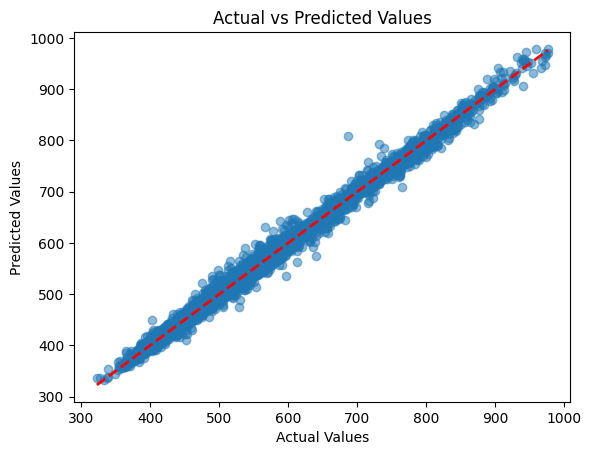

In [1733]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

In [1734]:
#Separate out the data point with max MAE:
absolute_errors = np.abs(predictions - y_test)
max_error_index = np.argmax(absolute_errors)

In [1735]:
for k, v in X_test.iloc[max_error_index].items():
    print(k, v)

DayOfWeek 0.0
Demand_lag_1 850.4
Demand_lag_10 691.4
Demand_lag_100 893.8
Demand_lag_101 878.9
Demand_lag_102 855.8
Demand_lag_103 819.9
Demand_lag_104 791.1
Demand_lag_105 736.9
Demand_lag_106 688.3
Demand_lag_107 643.9
Demand_lag_108 608.9
Demand_lag_109 572.1
Demand_lag_11 649.2
Demand_lag_110 555.6
Demand_lag_111 541.8
Demand_lag_112 543.6
Demand_lag_113 558.4
Demand_lag_114 572.2
Demand_lag_115 603.6
Demand_lag_116 639.5
Demand_lag_117 680.8
Demand_lag_118 728.1
Demand_lag_119 760.8
Demand_lag_12 613.2
Demand_lag_120 778.9
Demand_lag_121 826.2
Demand_lag_122 841.0
Demand_lag_123 836.1
Demand_lag_124 833.6
Demand_lag_125 822.9
Demand_lag_126 797.2
Demand_lag_127 741.6
Demand_lag_128 682.8
Demand_lag_129 642.4
Demand_lag_13 573.6
Demand_lag_130 620.6
Demand_lag_131 610.7
Demand_lag_132 616.5
Demand_lag_133 588.1
Demand_lag_134 551.6
Demand_lag_135 537.3
Demand_lag_136 522.8
Demand_lag_137 526.1
Demand_lag_138 536.5
Demand_lag_139 550.3
Demand_lag_14 546.9
Demand_lag_140 573.6
Demand

# KNN

In [354]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming X_train and y_train are already defined

# Update numerical_features if needed
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ])

# Create the KNN pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # You can adjust the n_neighbors parameter as needed
])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Temperature', 'feelslike', 'dewpoint', 'humidity', 'precipitation',
       'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed',
       'winddirection', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'uvindex', 'severerisk', 'preciptype_freezingrain',
       'precipty...
       'Demand_lag_6', 'Demand_lag_7', 'Demand_lag_8', 'Demand_lag_9',
       'Demand_lag_10', 'Demand_lag_11', 'Demand_lag_12', 'Demand_lag_13',
       'Demand_lag_14', 'Demand_lag_15', 'Demand_lag_16', 'Demand_lag_17',
       'Demand_lag_18', 'Demand_lag_19', 'Demand_lag_20', 'Demand_lag_21',
       'Demand_lag_22', 'Demand_lag_23', 'Demand_lag_24'],
      dtype='object'))])),
                ('regressor', KNeighborsRegressor())])

In [356]:
predictions = knn_pipeline.predict(X_test)

In [357]:
mse = mean_squared_error(y_test, predictions)

In [359]:
np.sqrt(mse)

26.51348219482379

# The Neural Network

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [34]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

In [35]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [111]:
class SimpleNNRegression(nn.Module):
    def __init__(self, input_features):
        super(SimpleNNRegression, self).__init__()
        self.fc1 = nn.Linear(input_features, 256) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 128) 
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [112]:
model = SimpleNNRegression(X_train.shape[1])
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [113]:
# Count the number of parameters:
total = 0
for i in model.parameters():
    total += i.numel()
print(total) 

98049


# Do not train this if you want inference only:

In [ ]:
from tqdm import tqdm
epochs = 30
for epoch in range(epochs):
    total_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}")

In [130]:
model = SimpleNNRegression(X_train.shape[1])
model_state_dict = torch.load('demand_model.pth')
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [115]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [116]:
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [117]:
try:
    model.eval()  # Set the model to evaluation mode
    total_mse = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            mse = criterion(outputs, labels.view(-1, 1))
            total_mse += mse.item()

    average_mse = total_mse / len(test_loader)
    print(f"\nMean Squared Error on Test Set: {average_mse:.4f}")
    # print(f"\nRoot Mean Squared Error on Test Set: {np.sqrt(average_mse):.4f}")
except:
    print("This is for full training, if you want validation, do 80-20 split")

This is for full training, if you want validation, do 80-20 split


In [118]:
try:
    assert len(X_test) != 0
    plt.scatter(y_test, model(X_test_tensor).detach().numpy(), alpha=0.5)
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Add a diagonal line for reference
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

    # Show the plot
    plt.show()
except:
    print("This is for full training, if you want validation, do 80-20 split")

This is for full training, if you want validation, do 80-20 split


# Filling out the table with the best one

In [124]:
my_demands = demand_df.tail(24*7).to_numpy().squeeze()

In [125]:
def run_weather_forecast(i):
    global my_demands
    assert len(my_demands) == 24*7+i
    empty_weather_df = weather_df[-168:].iloc[0:1].reset_index()
    last_24_elements = my_demands[-24*7:]
    lagged_demand_df = pd.DataFrame({f'Demand_lag_{i}': last_24_elements[::-1][i-1] for i in range(1, 24*7+1)}, index=[0])
    input_features = pd.concat([empty_weather_df, lagged_demand_df], axis=1).sort_index(axis=1)
    input_features = input_features.drop('index', axis=1)
    tensor_features = torch.tensor(input_features.to_numpy(), dtype=torch.float32)
    
    next = model(tensor_features).detach().numpy().flatten() 
    my_demands = np.concatenate([my_demands, next])

In [126]:
num_forecast_values = 24*7
for i in range(0, 24*7):
    run_weather_forecast(i)

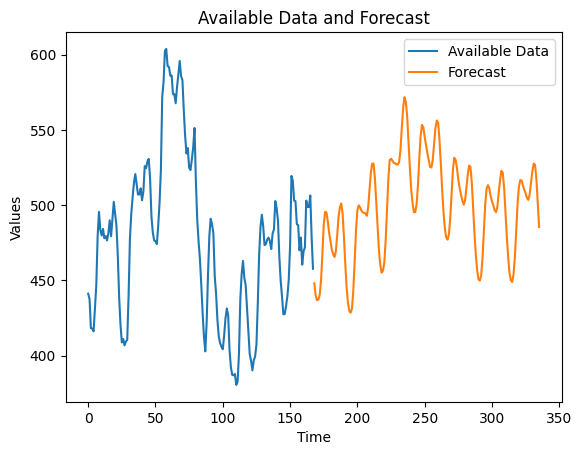

In [127]:
half_length = len(my_demands) // 2
available_data = my_demands[:half_length]
forecast = my_demands[half_length:]

# Plotting
plt.plot(np.arange(half_length), available_data, label='Available Data')
plt.plot(np.arange(half_length, len(my_demands)), forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Available Data and Forecast')
plt.legend()
plt.show()

In [1858]:
# Original demand for appending:
final_demand_df = pd.read_csv('Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Demand Data upto Feb 21.csv')

In [1870]:
last_datetime = pd.to_datetime(final_demand_df['datetime'].iloc[-1])
forecasted_datetimes = pd.date_range(start=last_datetime, periods=num_forecast_values + 1, freq='H')[1:]

In [1871]:
forecast_df = pd.DataFrame(forecasted_datetimes, columns=["datetime"])
forecast_df['Demand (MW)'] = my_demands[168:]

In [1873]:
forecast_df['datetime'] = forecast_df['datetime'].dt.strftime('%-m/%d/%Y %H:%M')

In [1874]:
forecast_df

,datetime,Demand (MW)
0,2/22/2023 00:00,450.175659
1,2/22/2023 01:00,442.797211
2,2/22/2023 02:00,440.153076
3,2/22/2023 03:00,442.488892
4,2/22/2023 04:00,448.522705
...,...,...
163,2/28/2023 19:00,567.996948
164,2/28/2023 20:00,566.827209
165,2/28/2023 21:00,558.226929
166,2/28/2023 22:00,544.702148


In [1877]:
forecast_df.to_csv('demand_forecast_df.csv', index=False, float_format='%.2f')

In [1890]:
final_demand_df

,datetime,Demand (MW)
0,1/1/2020 0:00,445.8
1,1/1/2020 1:00,424.5
2,1/1/2020 2:00,423.5
3,1/1/2020 3:00,418.8
4,1/1/2020 4:00,414.8
...,...,...
27547,2/21/2023 19:00,498.7
27548,2/21/2023 20:00,498.8
27549,2/21/2023 21:00,506.4
27550,2/21/2023 22:00,478.8


In [1889]:
forecast_df.head()

,datetime,Demand (MW)
0,2/22/2023 00:00,450.175659
1,2/22/2023 01:00,442.797211
2,2/22/2023 02:00,440.153076
3,2/22/2023 03:00,442.488892
4,2/22/2023 04:00,448.522705


In [1891]:
final_concat_df = pd.concat([final_demand_df, forecast_df], ignore_index=True)

In [1893]:
assert len(final_concat_df) == len(weather_df), "Mismatch in concatenation"

In [1894]:
final_concat_df.to_csv('demand_merged_forecast_df.csv', index=False, float_format='%.2f')

In [1895]:
#Check your result:

In [1896]:
check_df = pd.read_csv('merged_forecast_df.csv')